# Simulating lightcurves for SNe Ia

This notebooks shows an example of a simulating SN Ia lightcurves based on the SALT2 template for 90 days of ZTF observations. (The survey is restricted to 90 days in order to run reasonably fast. A similar simulation for a 3-year survey can be generated using SNIa_3yr.py.)

In [1]:
import warnings
## No annoying warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import simsurvey.cadence as simul

import simsurvey_tools as sst

In [2]:
# Set the time frame for the survey (90 days)
mjd_range = (58000, 58090)

The transient generator randomly draws all parameters needed to simulate the lightcurves. For the SALT2 template most things are predefined. The only input required is the frame, which should be set to include a number of days before and after the survey in order to simulate all SNe that may be visible during the observations. Additionally, to reduce the computation time, the  coordinate ranges can be restricted such that only few SNe outside the observed part of the sky are simulated.

In [3]:
tr = simul.get_sn_generator([0.,0.2], ratekind="basic", 
                            dec_range=[-40,90],
                            mjd_range=[mjd_range[0] - 60, mjd_range[-1] + 24])

The plan object collects all required information of the survey strategy. The function used below generates a simple mock survey to get a basic idea of what we can expect from ZTF, see its docstring in `simsurvey_tools.py` for more information. The output of Eric's `ztf_sim` code can also be loaded into a plan object, see `plan_from_ztf_sim.ipynb`. (Currently the code uses DES $gri$ filters instead of the ZTF ones, which be included later.)

In [4]:
plan = sst.get_survey_plan_simple(mjd_range=mjd_range)

In [5]:
plan.cadence

band,skynoise,field,RA,time,Dec
str4,float64,int64,float64,float64,float64
desr,800.0,661,57.69565,58000.0,31.75385
desr,800.0,666,96.82609,58000.0005208,31.75385
desr,800.0,662,65.52174,58000.0010417,31.75385
desr,800.0,659,42.04348,58000.0015625,31.75385
desr,800.0,658,34.21739,58000.0020833,31.75385
desr,800.0,667,104.65217,58000.0026042,31.75385
desr,800.0,665,89.0,58000.003125,31.75385
desr,800.0,654,2.91304,58000.0036458,31.75385
desr,800.0,656,18.56522,58000.0041667,31.75385


Lastly, some basic properties of the instrument used in the survey must be defined but these are mostly chosen in order to get specific depths of the observations and need not be changed.

In [6]:
instprop = {"desg":{"gain":1.,"zp":30,"zpsys":'ab'},
            "desr":{"gain":1.,"zp":30,"zpsys":'ab'},
            "desi":{"gain":1.,"zp":30,"zpsys":'ab'}}

These three components are collected in a SimulSurvey object, which is then used to generate the lightcurves.

In [7]:
survey = simul.SimulSurvey(generator=tr, 
                           plan=plan, 
                           instprop=instprop)

lcs = survey.get_lightcurves(
    # This cell may give an error because of the progress bar widget.
    # Just delete the following line to fix this.
    progress_bar=True, notebook=True
)

Determining field IDs for all objects

Generating lightcurves



The output is a `LightcurveCollection` object that organizes the lightcurves and can be accessed as shown below.

In [8]:
lcs[0]

time,band,flux,fluxerr,zp,zpsys
float64,str4,float64,float64,int64,str2
58000.059375,desr,8113.21564055,804.278734691,30,ab
58000.0739583,desr,5742.00410262,804.276939564,30,ab
58000.1427083,desr,5975.97219876,804.268420417,30,ab
58000.1572917,desr,7568.57572196,804.266601359,30,ab
58001.0588542,desr,6138.90760134,804.146755543,30,ab
58001.0744792,desr,5262.80979871,804.14455467,30,ab
58001.1421875,desr,6943.48443303,804.134968924,30,ab
58001.1578125,desr,7116.09087895,804.132745606,30,ab
58002.0588542,desr,6867.88750915,803.997160712,30,ab


## Analysing the output

The output of `get_lightcurves()` is a `LightcurveCollection` object. Below are some examples how to assess survey statistics based on this.

The first skyplot shows all SNe that were active when a field was observed (but they may have been too faint to be detected). The second skyplot shows the SNe that had at least one $5\sigma$ detection. 

SNe pointed to: 4386 out of 23305


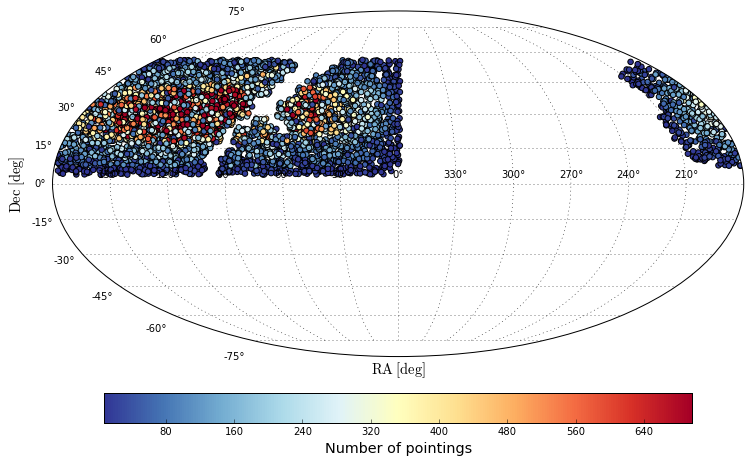

In [9]:
idx = lcs.meta['idx_orig']
n_obs = np.zeros(survey.generator.ntransient)
n_obs[idx] = np.array([len(a) for a in lcs])

survey.generator.show_skycoverage(cscale=n_obs, cblabel="Number of pointings", mask=idx)
print 'SNe pointed to: %i out of %i'%(np.sum(n_obs > 0), survey.generator.ntransient)

SNe detected: 2817 out of 23305


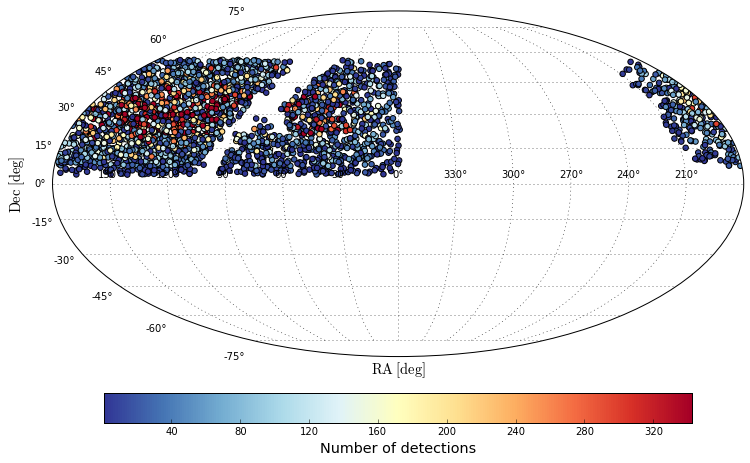

In [10]:
t_exp = -20

lcs_det = [lc[lc['flux']/lc['fluxerr'] > 5] for lc in lcs]
lcs_det = [lc[lc['time'] > t_exp*(1+lc.meta['z']) + lc.meta['t0']] for lc in lcs_det]

idx_det = lcs.meta['idx_orig'][np.array([len(lc) > 0 for lc in lcs_det])]
n_det = np.zeros(survey.generator.ntransient)
lcs_det = [lc for lc in lcs_det if len(lc) > 0]
n_det[idx_det] = np.array([len(a) for a in lcs_det])

survey.generator.show_skycoverage(cscale=n_det, cblabel="Number of detections", mask=idx_det)
print 'SNe detected: %i out of %i'%(np.sum(n_det > 0), survey.generator.ntransient)

In [11]:
z = np.array([lc.meta['z'] for lc in lcs_det])
p_i = np.array([lc['time'].min() - lc.meta['t0'] for lc in lcs_det])
p_e = np.array([lc['time'].max() - lc.meta['t0'] for lc in lcs_det])

The two last figures show how early the SNe are detected and at what redshift.

SNe found before peak: 1746


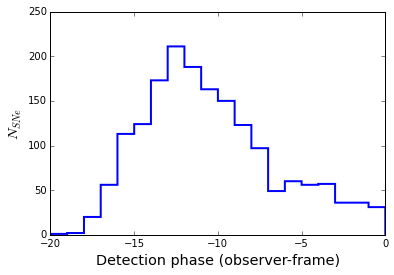

In [12]:
plt.hist(p_i, lw=2, histtype='step', range=(-20,0), bins=20)
print 'SNe found before peak:', np.sum(p_i < 0)
plt.xlabel('Detection phase (observer-frame)', fontsize='x-large')
plt.ylabel(r'$N_{SNe}$', fontsize='x-large')

SNe found 14 observer-frame days before peak: 316
Local SNe (z < 0.1) found 14 observer-frame days before peak: 144


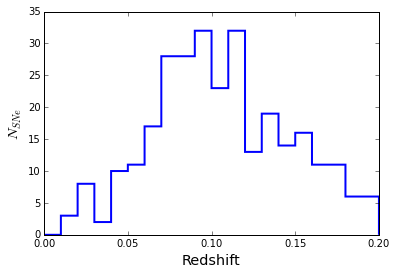

In [13]:
p_lim = -14
n = np.array([len(lc) for lc in lcs_det])
snr_max = np.array([max(lc['flux']/lc['fluxerr']) for lc in lcs_det])
plt.hist(z[(p_i < p_lim) & (snr_max >= 10)], lw=2, histtype='step', range=(0,0.2),bins=20)
print 'SNe found 14 observer-frame days before peak:', np.sum(p_i < p_lim) 
print 'Local SNe (z < 0.1) found 14 observer-frame days before peak:', np.sum((p_i < p_lim) & (z < 0.1))
plt.xlabel('Redshift', fontsize='x-large')
plt.ylabel(r'$N_{SNe}$', fontsize='x-large')
_ = plt.xlim((0, 0.2))